In [4]:
import pandas as pd
import numpy as np
import matplotlib as mat
import seaborn as sea


In [5]:
data_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'


In [6]:
df = pd.read_csv(data_url)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

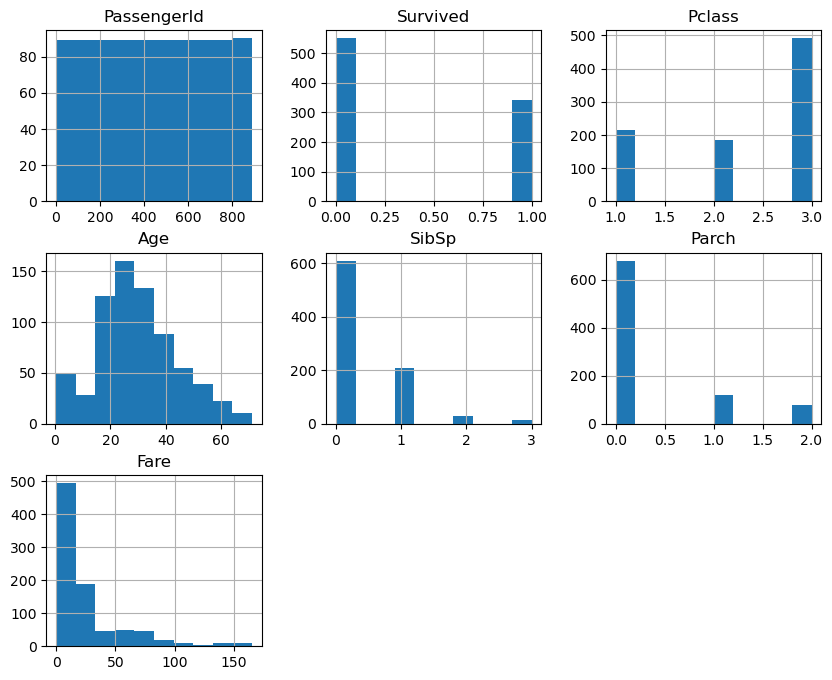

In [180]:
df.hist(figsize=(10, 8))

<Axes: >

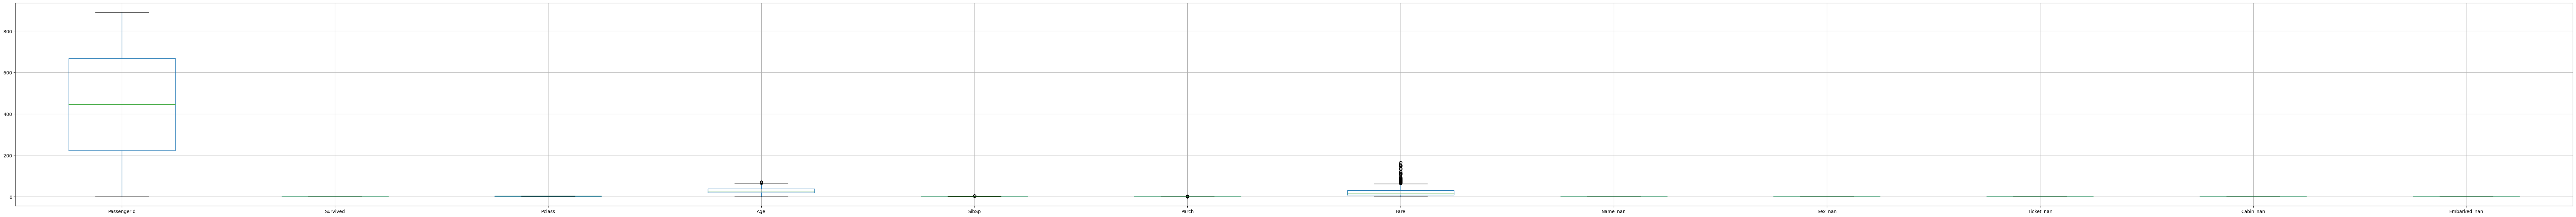

In [179]:
df.boxplot(figsize=(100,8))

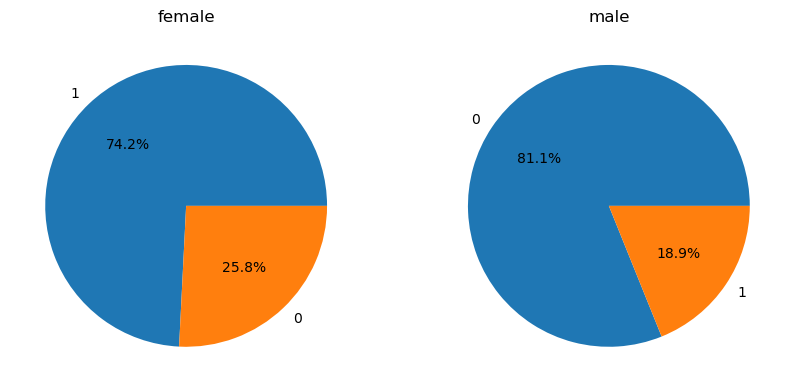

In [178]:
# Group the data by sex

if 'Embarked' in df.columns:
    grouped_data = df.groupby('Sex')

# Create a pie chart for each sex
fig, axes = mat.pyplot.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, (sex, group) in enumerate(grouped_data):
    group['Survived'].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%')
    axes[i].set_title(sex)
    axes[i].set_ylabel('')

In [3]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()




NameError: name 'df' is not defined

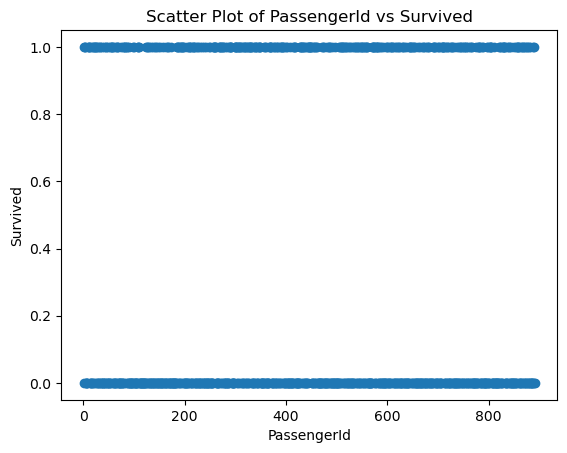

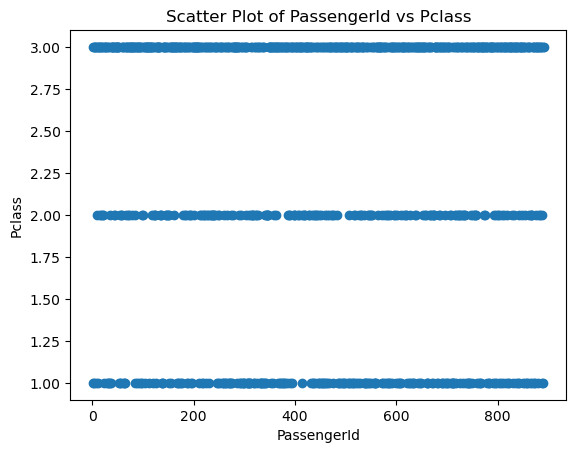

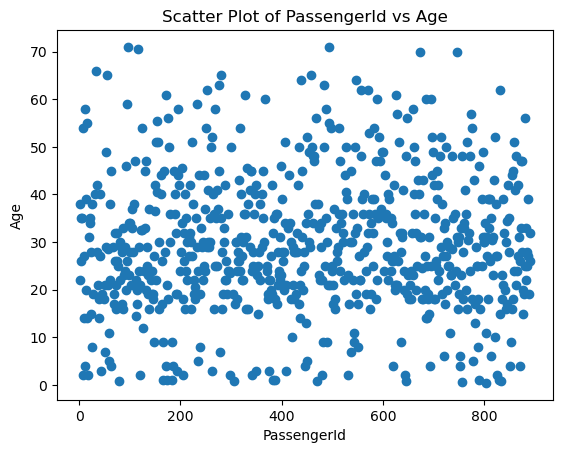

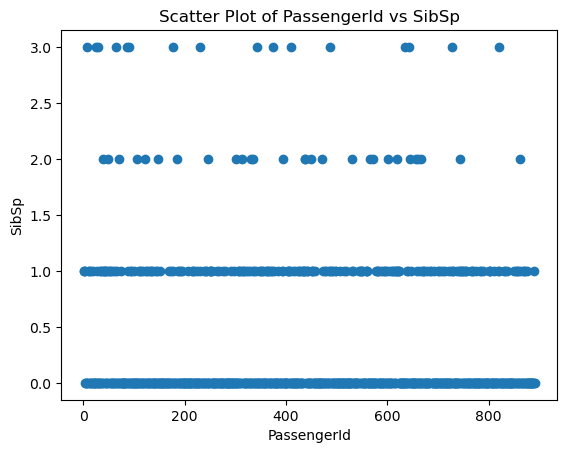

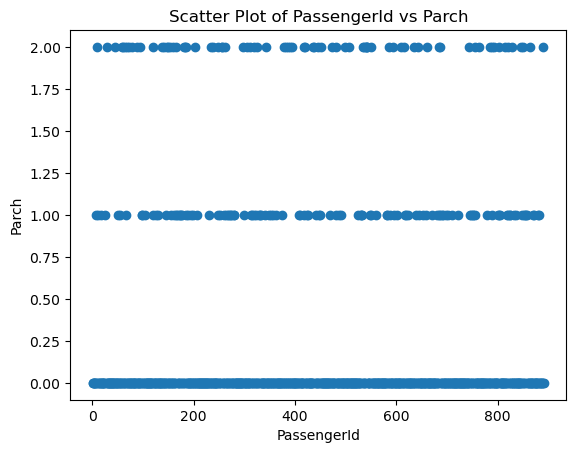

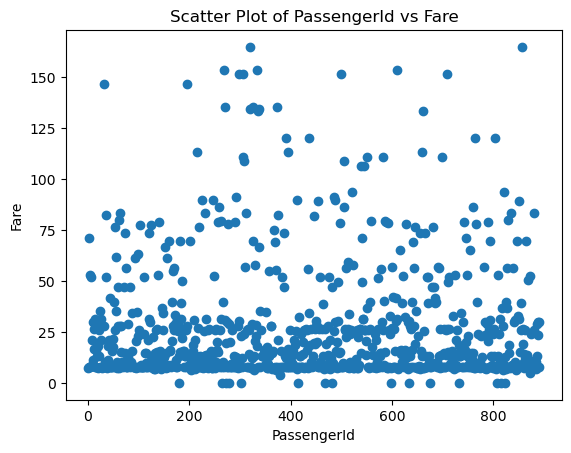

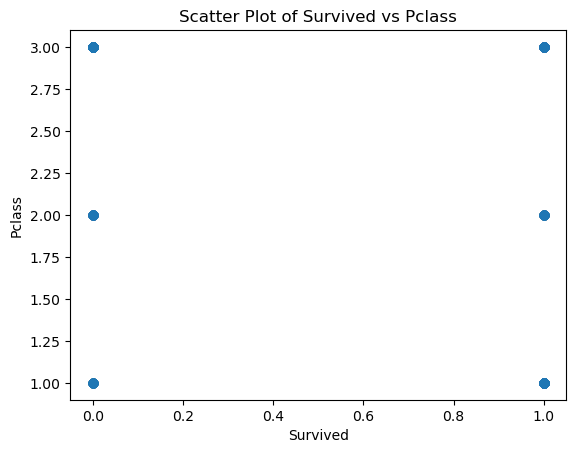

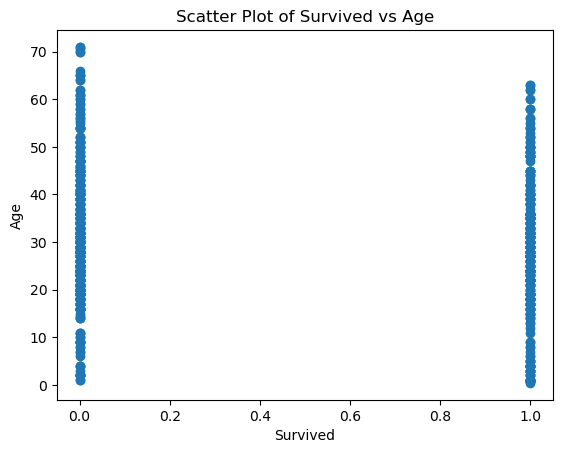

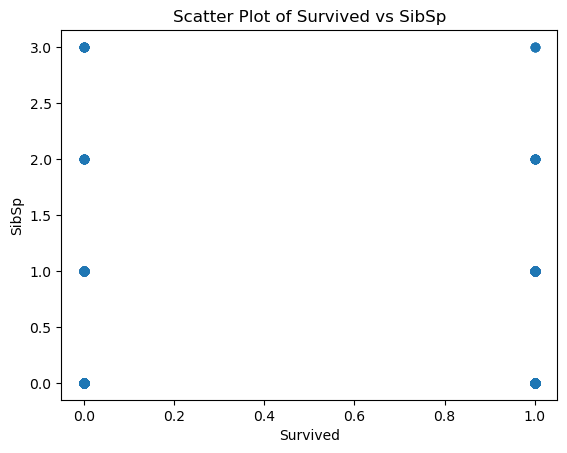

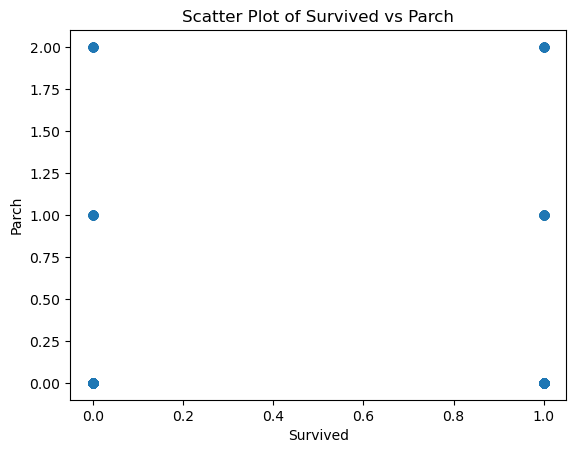

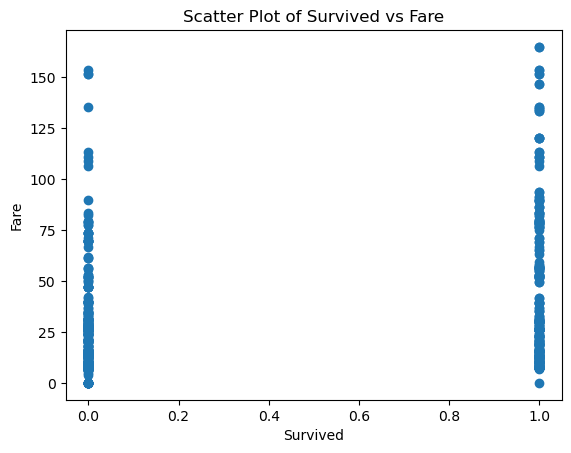

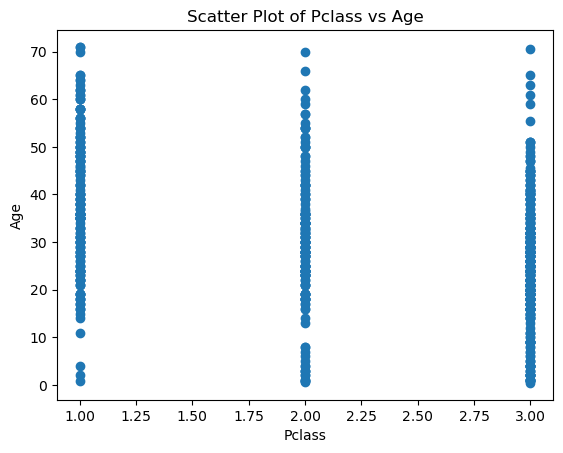

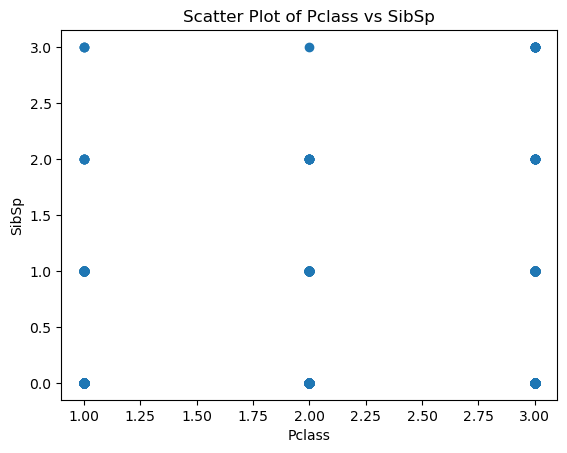

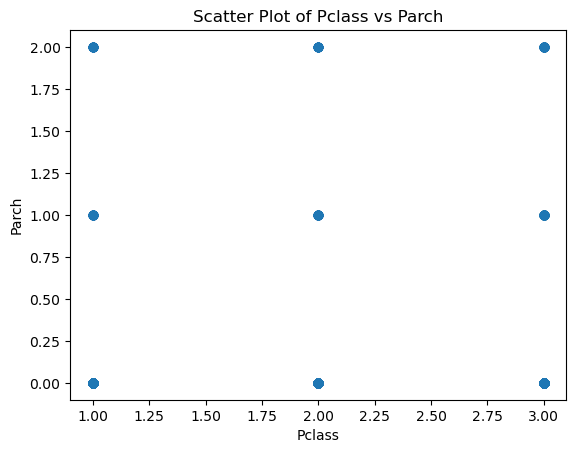

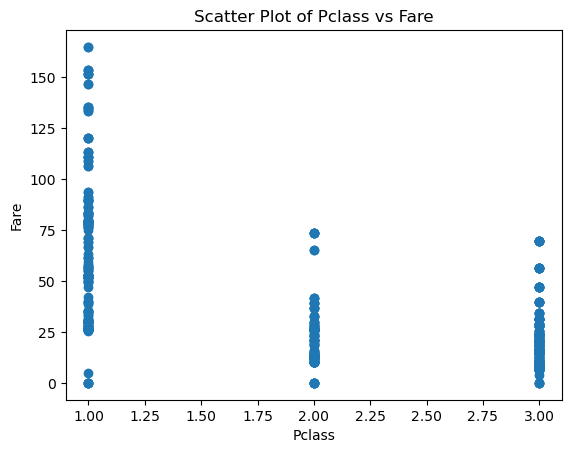

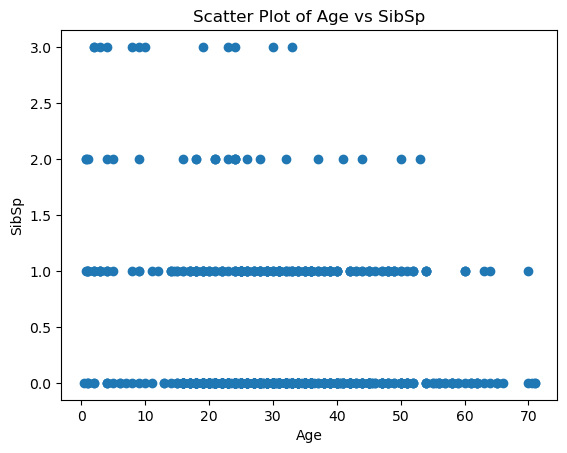

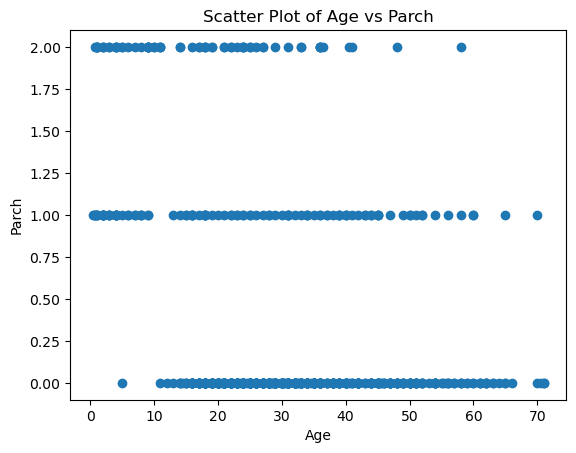

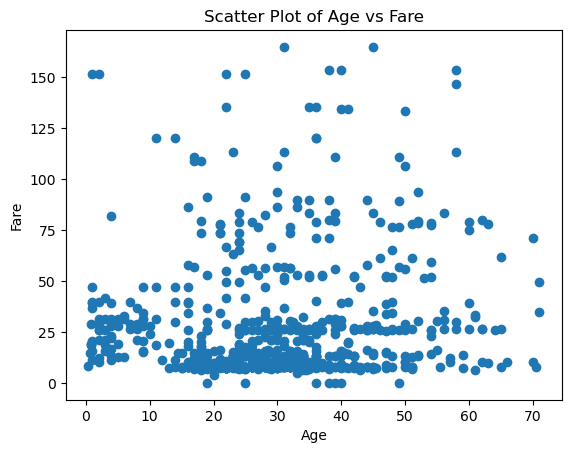

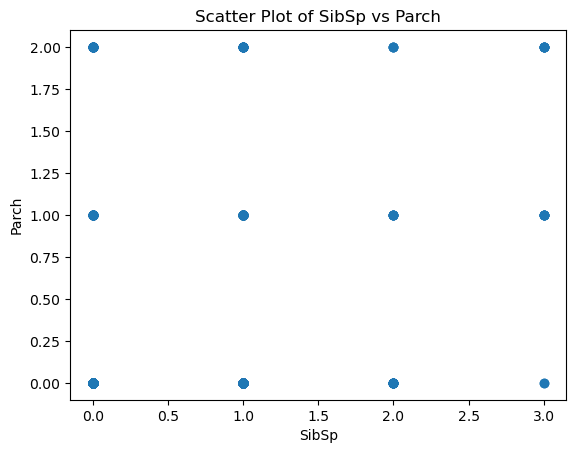

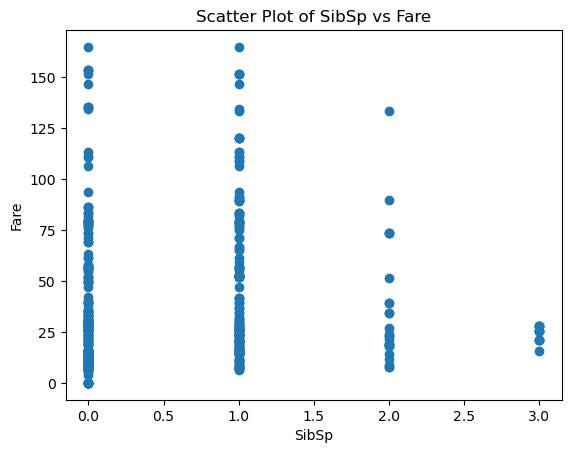

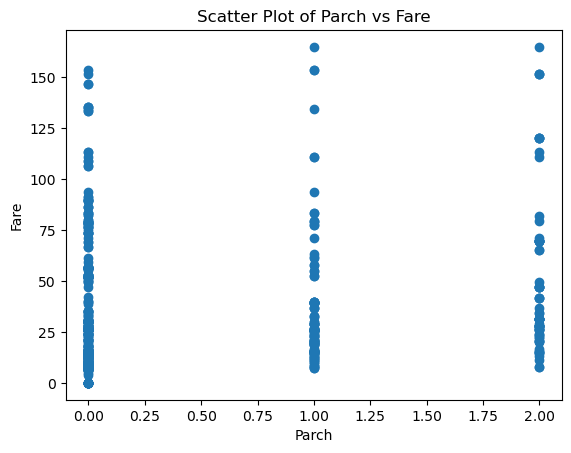

In [176]:
# Create scatter plots for each pair of numeric columns
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        mat.pyplot.figure()
        mat.pyplot.scatter(df[numeric_columns[i]], df[numeric_columns[j]])
        mat.pyplot.xlabel(numeric_columns[i])
        mat.pyplot.ylabel(numeric_columns[j])
        mat.pyplot.title('Scatter Plot of {} vs {}'.format(numeric_columns[i], numeric_columns[j]))
        mat.pyplot.show()

In [175]:
missing_data = df.isnull().sum()

for column, missing_count in missing_data.items():
  if missing_count > 0:
    print(f"Column '{column}' has {missing_count} missing values.")
    missing_rows = df[df[column].isnull()].index
    print(f"Missing data locations: {missing_rows}")


Column 'Age' has 179 missing values.
Missing data locations: Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       837, 839, 846, 849, 851, 859, 863, 868, 878, 888],
      dtype='int64', length=179)
Column 'SibSp' has 30 missing values.
Missing data locations: Index([ 16,  50,  59,  68,  71, 119, 159, 164, 171, 180, 182, 201, 233, 261,
       266, 278, 324, 386, 480, 541, 542, 683, 686, 787, 792, 813, 824, 846,
       850, 863],
      dtype='int64')
Column 'Parch' has 15 missing values.
Missing data locations: Index([13, 25, 86, 167, 360, 437, 438, 567, 610, 638, 678, 736, 774, 858, 885], dtype='int64')
Column 'Fare' has 20 missing values.
Missing data locations: Index([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679, 689,
       700, 716, 730, 737, 742, 779],
      dtype='int64')


In [174]:
# Identify categorical columns with missing values
cat_cols = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]

# Perform one-hot encoding on categorical columns with missing values
df = pd.get_dummies(df, columns=cat_cols, dummy_na=True)

# Print the updated DataFrame
print(df)


     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Name_nan  \
0              1         0       3  22.0    1.0    0.0   7.2500      True   
1              2         1       1  38.0    1.0    0.0  71.2833      True   
2              3         1       3  26.0    0.0    0.0   7.9250      True   
3              4         1       1  35.0    1.0    0.0  53.1000      True   
4              5         0       3  35.0    0.0    0.0   8.0500      True   
..           ...       ...     ...   ...    ...    ...      ...       ...   
886          887         0       2  27.0    0.0    0.0  13.0000      True   
887          888         1       1  19.0    0.0    0.0  30.0000      True   
888          889         0       3   NaN    1.0    2.0  23.4500      True   
889          890         1       1  26.0    0.0    0.0  30.0000      True   
890          891         0       3  32.0    0.0    0.0   7.7500      True   

     Sex_nan  Ticket_nan  Cabin_nan  Embarked_nan  
0       True        Tru

In [173]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define outlier thresholds
lower_boundary = df[numerical_columns].mean() - 3 * df[numerical_columns].std()
upper_boundary = df[numerical_columns].mean() + 3 * df[numerical_columns].std()

# Remove outliers
df = df[(df[numerical_columns] >= lower_boundary) & (df[numerical_columns] <= upper_boundary)]

# Print the cleaned DataFrame
print(df)

     PassengerId  Survived  Pclass Name  Sex   Age  SibSp  Parch Ticket  \
0              1         0       3  NaN  NaN  22.0    1.0    0.0    NaN   
1              2         1       1  NaN  NaN  38.0    1.0    0.0    NaN   
2              3         1       3  NaN  NaN  26.0    0.0    0.0    NaN   
3              4         1       1  NaN  NaN  35.0    1.0    0.0    NaN   
4              5         0       3  NaN  NaN  35.0    0.0    0.0    NaN   
..           ...       ...     ...  ...  ...   ...    ...    ...    ...   
886          887         0       2  NaN  NaN  27.0    0.0    0.0    NaN   
887          888         1       1  NaN  NaN  19.0    0.0    0.0    NaN   
888          889         0       3  NaN  NaN   NaN    1.0    2.0    NaN   
889          890         1       1  NaN  NaN  26.0    0.0    0.0    NaN   
890          891         0       3  NaN  NaN  32.0    0.0    0.0    NaN   

        Fare Cabin Embarked  
0     7.2500   NaN      NaN  
1    71.2833   NaN      NaN  
2     7.9

In [172]:
# Fix typos in "Sex" column
df['Sex'] = df['Sex'].replace('female', 'Female')
df['Sex'] = df['Sex'].replace('male', 'Male')

# Fix inconsistencies in "Embarked" column
if 'Embarked' in df.columns:
    # Fix inconsistencies in "Embarked" column
    df['Embarked'] = df['Embarked'].replace('S', 'Southampton')
    df['Embarked'] = df['Embarked'].replace('C', 'Cherbourg')
    df['Embarked'] = df['Embarked'].replace('Q', 'Queenstown')

# Fix invalid values in "Age" column
df['Age'] = df['Age'].replace(-0.8333, 0.8333)

# Print the cleaned DataFrame
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    Male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  Female  38.0      1   
2                             Heikkinen, Miss. Laina  Female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  Female  35.0      1   
4                           Allen, Mr. William Henry    Male  35.0      0   

   Parch            Ticket     Fare Cabin     Embarked  
0      0         A/5 21171   7.2500   NaN  Southampton  
1      0          PC 17599  71.2833   C85    Cherbourg  
2      0  STON/O2. 3101282   7.9250   NaN  Southampton  
3      0            113803  53.1000  C123  Southampton  
4      0            373450   8.0500

In [167]:
# Calculate the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Select the upper triangle of the correlation matrix
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))

# Find the features with high correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the highly correlated features
df.drop(to_drop, axis=1, inplace=True)

# Print the new data frame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
